In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings

%matplotlib inline

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# setting view options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
s_df = pd.read_csv('prosmash.csv')
ns_df = pd.read_csv('noobsmash.csv')

In [3]:
s_df.reset_index(drop=True, inplace=True)

In [4]:
s_df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
# Visualizing what the dataframe looks like
s_df

,RW,LW,RE,LE,RS,LS,RH,LH,Smash
0,179.86,173.80,165.99,88.96,161.49,21.08,170.44,149.41,1
1,162.03,125.38,168.89,85.25,169.37,23.47,44.18,34.46,1
2,172.87,176.51,168.63,90.48,166.40,21.88,171.98,152.26,1
3,169.07,133.21,147.47,118.43,124.33,29.88,173.34,165.13,1
4,169.77,166.63,168.41,154.13,149.16,67.39,172.53,170.26,1
5,45.87,166.67,169.07,76.36,178.15,4.17,168.47,154.59,1
6,172.64,107.51,159.15,107.33,135.67,22.73,167.91,155.61,1
7,179.30,126.67,133.18,122.49,105.91,33.62,177.69,168.94,1
8,170.56,173.22,167.42,81.87,158.76,11.58,170.48,153.94,1
9,159.82,151.41,104.09,91.68,102.35,26.27,46.90,15.03,1


In [6]:
ns_df.drop(columns=['Unnamed: 0'],inplace=True)
# Visualizing what the dataframe looks like
ns_df

,RW,LW,RE,LE,RS,LS,RH,LH,Smash
0,176.95,168.38,168.54,99.36,122.25,2.89,169.29,155.18,0
1,176.59,168.81,176.22,103.70,156.84,13.95,168.81,178.63,0
2,172.72,160.75,162.94,127.72,135.05,47.07,178.33,175.23,0
3,161.14,153.08,128.64,122.16,130.88,40.96,177.06,176.31,0
4,161.79,140.90,175.56,73.19,163.86,15.70,150.40,175.71,0
5,164.84,162.08,177.90,68.50,145.19,1.30,177.08,152.15,0
6,148.13,177.04,96.48,14.80,163.47,97.98,177.03,120.48,0
7,157.00,172.84,110.43,84.16,101.29,2.93,167.61,160.44,0
8,156.32,19.48,161.13,64.29,156.02,41.98,161.91,149.17,0
9,163.10,171.63,156.12,161.33,148.27,58.00,177.64,160.42,0


Looking at what Kind of Data I am using

In [7]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RW      46 non-null     float64
 1   LW      46 non-null     float64
 2   RE      46 non-null     float64
 3   LE      46 non-null     float64
 4   RS      46 non-null     float64
 5   LS      46 non-null     float64
 6   RH      46 non-null     float64
 7   LH      46 non-null     float64
 8   Smash   46 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 3.4 KB


In [8]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RW      44 non-null     float64
 1   LW      44 non-null     float64
 2   RE      44 non-null     float64
 3   LE      44 non-null     float64
 4   RS      44 non-null     float64
 5   LS      44 non-null     float64
 6   RH      44 non-null     float64
 7   LH      44 non-null     float64
 8   Smash   44 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 3.2 KB


Looking at the spread

In [9]:
s_df.describe()

,RW,LW,RE,LE,RS,LS,RH,LH,Smash
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,163.234348,148.046522,159.540435,96.503043,152.063261,21.733043,163.345000,150.935435,1.0
std,23.703228,28.497809,26.932245,23.135114,18.775739,27.023197,27.353088,29.760128,0.0
min,45.870000,33.940000,9.720000,52.430000,99.200000,0.730000,44.180000,15.030000,1.0
25%,163.627500,133.232500,157.030000,81.135000,144.982500,6.502500,165.897500,149.192500,1.0
50%,170.265000,153.740000,167.360000,91.245000,154.415000,13.660000,170.975000,155.340000,1.0
75%,174.795000,172.020000,171.522500,106.862500,166.225000,23.285000,175.857500,165.065000,1.0
max,179.860000,178.250000,178.730000,157.890000,178.150000,133.810000,179.900000,177.230000,1.0


In [10]:
ns_df.describe()

,RW,LW,RE,LE,RS,LS,RH,LH,Smash
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,161.108864,156.184091,130.769318,98.670682,105.815682,47.977727,159.497727,153.870227,0.0
std,12.927010,28.968348,52.395948,37.288276,55.802634,46.643089,30.947240,30.704369,0.0
min,126.160000,19.480000,1.240000,14.800000,1.290000,1.300000,18.810000,18.070000,0.0
25%,155.537500,158.007500,96.212500,72.017500,68.717500,16.510000,155.820000,148.917500,0.0
50%,163.455000,162.685000,156.890000,99.350000,127.910000,32.080000,170.000000,160.675000,0.0
75%,170.700000,171.865000,169.195000,122.570000,149.950000,58.847500,174.480000,173.447500,0.0
max,178.430000,177.350000,179.950000,176.590000,176.040000,179.400000,178.330000,178.630000,0.0


In [11]:
s_df.columns

Index(['RW', 'LW', 'RE', 'LE', 'RS', 'LS', 'RH', 'LH', 'Smash'], dtype='object')

In [12]:
ns_df.columns

Index(['RW', 'LW', 'RE', 'LE', 'RS', 'LS', 'RH', 'LH', 'Smash'], dtype='object')

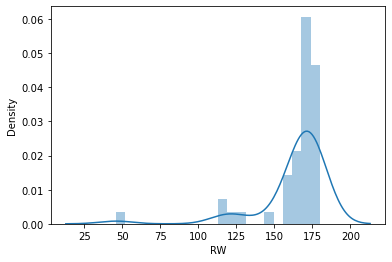

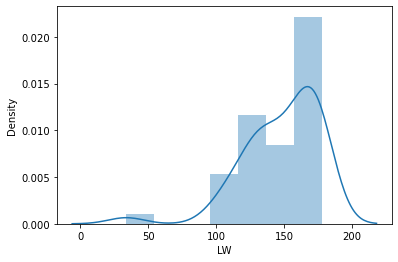

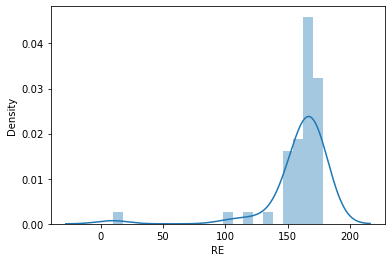

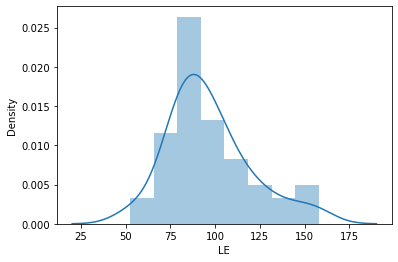

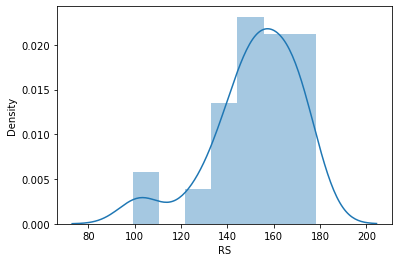

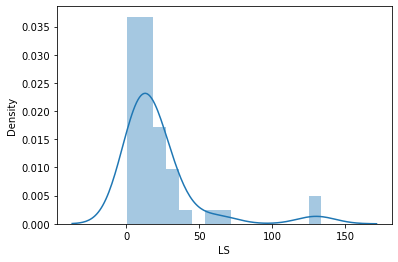

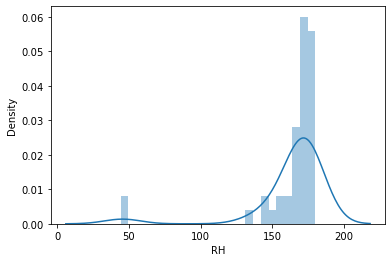

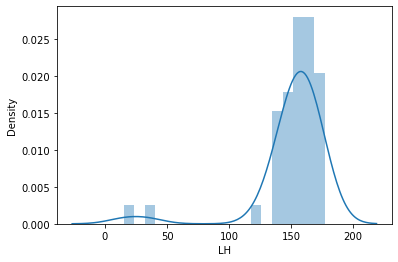

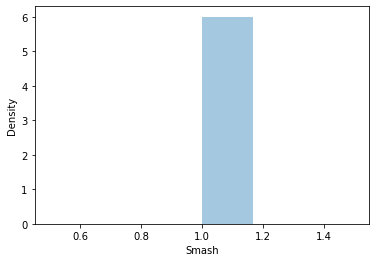

In [13]:
# Visualizing the distribution
for column in s_df.columns:
    plt.figure()
    sns.distplot(s_df[column])

# Time for cleaning
From the above graphs
From the onset, cleaning needs to be done on
- Right Wrist
- Left Wrist
- Right Elbow
- Left Shoulder
- Right Hip
- Left Hip
<br> <br> Probably...?

The Empirical Rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations of the mean. Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean.

In [15]:
# I will just be a lazy bum and drop anything not within the 99.7% percentile as defined above

s_df_new = s_df[(s_df['RW'] < s_df['RW'].mean() + 3*np.std(s_df['RW']))]
s_df_new = s_df[(s_df['LW'] < s_df['LW'].mean() + 3*np.std(s_df['LW']))]
s_df_new = s_df[(s_df['RE'] < s_df['RE'].mean() + 3*np.std(s_df['RE']))]
s_df_new = s_df[(s_df['LE'] < s_df['LE'].mean() + 3*np.std(s_df['LE']))]
s_df_new = s_df[(s_df['RS'] < s_df['RS'].mean() + 3*np.std(s_df['RS']))]
s_df_new = s_df[(s_df['LS'] < s_df['LS'].mean() + 3*np.std(s_df['LS']))]
s_df_new = s_df[(s_df['RH'] < s_df['RH'].mean() + 3*np.std(s_df['RH']))]
s_df_new = s_df[(s_df['LH'] < s_df['LH'].mean() + 3*np.std(s_df['LH']))]

In [16]:
s_df_new
# LOL no values dropped

,RW,LW,RE,LE,RS,LS,RH,LH,Smash
0,179.86,173.80,165.99,88.96,161.49,21.08,170.44,149.41,1
1,162.03,125.38,168.89,85.25,169.37,23.47,44.18,34.46,1
2,172.87,176.51,168.63,90.48,166.40,21.88,171.98,152.26,1
3,169.07,133.21,147.47,118.43,124.33,29.88,173.34,165.13,1
4,169.77,166.63,168.41,154.13,149.16,67.39,172.53,170.26,1
5,45.87,166.67,169.07,76.36,178.15,4.17,168.47,154.59,1
6,172.64,107.51,159.15,107.33,135.67,22.73,167.91,155.61,1
7,179.30,126.67,133.18,122.49,105.91,33.62,177.69,168.94,1
8,170.56,173.22,167.42,81.87,158.76,11.58,170.48,153.94,1
9,159.82,151.41,104.09,91.68,102.35,26.27,46.90,15.03,1


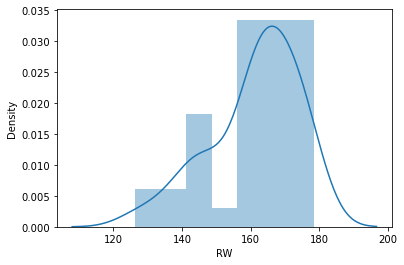

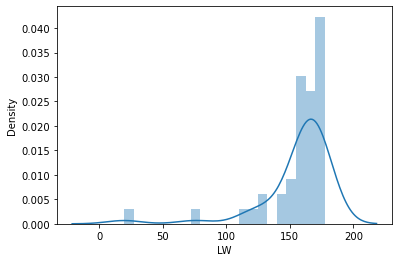

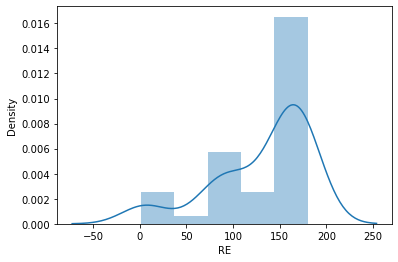

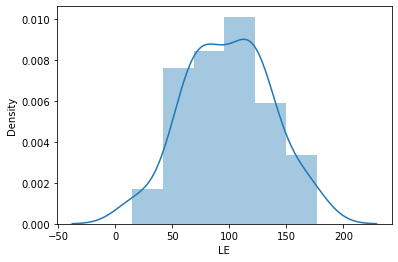

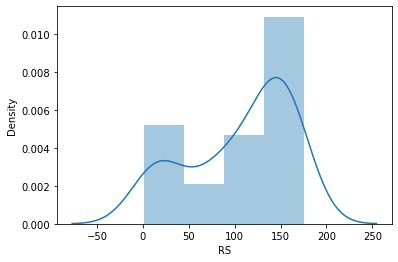

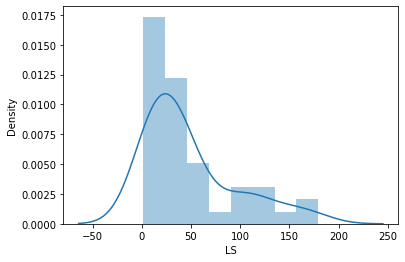

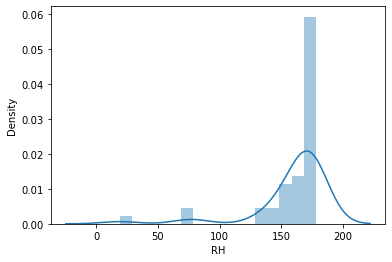

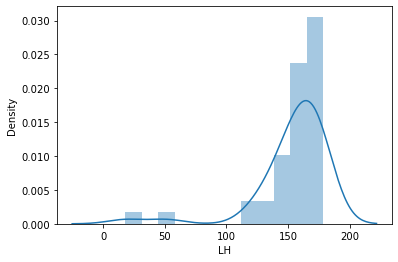

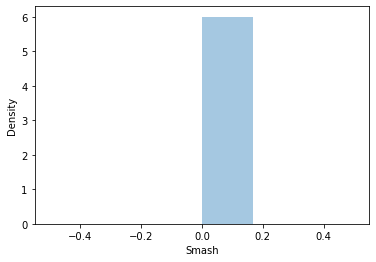

In [14]:
# Visualizing the distribution
for column in ns_df.columns:
    plt.figure()
    sns.distplot(ns_df[column])

The Empirical Rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations of the mean. Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean.

In [17]:
# Blah blah blah as stated above
ns_df_new = ns_df[(s_df['RW'] < ns_df['RW'].mean() + 3*np.std(ns_df['RW']))]
ns_df_new = ns_df[(s_df['LW'] < ns_df['LW'].mean() + 3*np.std(ns_df['LW']))]
ns_df_new = ns_df[(ns_df['RE'] < ns_df['RE'].mean() + 3*np.std(ns_df['RE']))]
ns_df_new = ns_df[(ns_df['LE'] < ns_df['LE'].mean() + 3*np.std(ns_df['LE']))]
ns_df_new = ns_df[(ns_df['RS'] < ns_df['RS'].mean() + 3*np.std(ns_df['RS']))]
ns_df_new = ns_df[(ns_df['LS'] < ns_df['LS'].mean() + 3*np.std(ns_df['LS']))]
ns_df_new = ns_df[(ns_df['RH'] < ns_df['RH'].mean() + 3*np.std(ns_df['RH']))]
ns_df_new = ns_df[(ns_df['LH'] < ns_df['LH'].mean() + 3*np.std(ns_df['LH']))]

In [18]:
ns_df_new
# Interesting. Got 1 value dropped

,RW,LW,RE,LE,RS,LS,RH,LH,Smash
0,176.95,168.38,168.54,99.36,122.25,2.89,169.29,155.18,0
1,176.59,168.81,176.22,103.70,156.84,13.95,168.81,178.63,0
2,172.72,160.75,162.94,127.72,135.05,47.07,178.33,175.23,0
3,161.14,153.08,128.64,122.16,130.88,40.96,177.06,176.31,0
4,161.79,140.90,175.56,73.19,163.86,15.70,150.40,175.71,0
5,164.84,162.08,177.90,68.50,145.19,1.30,177.08,152.15,0
6,148.13,177.04,96.48,14.80,163.47,97.98,177.03,120.48,0
7,157.00,172.84,110.43,84.16,101.29,2.93,167.61,160.44,0
8,156.32,19.48,161.13,64.29,156.02,41.98,161.91,149.17,0
9,163.10,171.63,156.12,161.33,148.27,58.00,177.64,160.42,0


In [19]:
# Merging both data frams
df = pd.concat([s_df_new, ns_df_new],ignore_index=True, sort=False)

In [20]:
df.reset_index(drop=True, inplace=True)
df

,RW,LW,RE,LE,RS,LS,RH,LH,Smash
0,179.86,173.80,165.99,88.96,161.49,21.08,170.44,149.41,1
1,162.03,125.38,168.89,85.25,169.37,23.47,44.18,34.46,1
2,172.87,176.51,168.63,90.48,166.40,21.88,171.98,152.26,1
3,169.07,133.21,147.47,118.43,124.33,29.88,173.34,165.13,1
4,169.77,166.63,168.41,154.13,149.16,67.39,172.53,170.26,1
5,45.87,166.67,169.07,76.36,178.15,4.17,168.47,154.59,1
6,172.64,107.51,159.15,107.33,135.67,22.73,167.91,155.61,1
7,179.30,126.67,133.18,122.49,105.91,33.62,177.69,168.94,1
8,170.56,173.22,167.42,81.87,158.76,11.58,170.48,153.94,1
9,159.82,151.41,104.09,91.68,102.35,26.27,46.90,15.03,1


In [21]:
df.to_csv('Cleaned.csv')